# TensorFlow: Evaluating & Prediction

In [1]:
import tensorflow as tf
from tensorflow.keras import layers

from tensorflow.keras import datasets 

# Build Model

In [2]:
input_shape = (28, 28, 1)
num_classes = 10

learning_rate = 0.001

In [3]:
inputs = layers.Input(input_shape)
net = layers.Conv2D(32, (3, 3), padding='SAME')(inputs)
net = layers.Activation('relu')(net)
net = layers.Conv2D(32, (3, 3), padding='SAME')(net)
net = layers.Activation('relu')(net)
net = layers.MaxPooling2D(pool_size=(2, 2))(net)
net = layers.Dropout(0.5)(net)

net = layers.Conv2D(64, (3, 3), padding='SAME')(net)
net = layers.Activation('relu')(net)
net = layers.Conv2D(64, (3, 3), padding='SAME')(net)
net = layers.Activation('relu')(net)
net = layers.MaxPooling2D(pool_size=(2, 2))(net)
net = layers.Dropout(0.5)(net)

net = layers.Flatten()(net)
net = layers.Dense(512)(net)
net = layers.Activation('relu')(net)
net = layers.Dropout(0.5)(net)
net = layers.Dense(num_classes)(net)
net = layers.Activation('softmax')(net)

model = tf.keras.Model(inputs=inputs, outputs=net, name='Basic_CNN')

In [4]:
# Model is the full model w/o custom layers
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Preprocess

데이터셋 불러오기 

In [5]:
(train_x, train_y), (test_x, test_y) = datasets.mnist.load_data()

In [6]:
train_x = train_x[..., tf.newaxis]
test_x = test_x[..., tf.newaxis]

train_x = train_x / 255.
test_x = test_x / 255.

# Training

In [7]:
num_epochs = 1
batch_size = 64

In [8]:
hist = model.fit(train_x, train_y, 
                 batch_size=batch_size, 
                 shuffle=True)

938/938 [==============================] - 105s 111ms/step - loss: 0.2140 - accuracy: 0.9325


In [9]:
hist.history

{'loss': [0.21396633982658386], 'accuracy': [0.932533323764801]}

# Evaluating  
- 학습한 모델 확인

In [10]:
model.evaluate(test_x, test_y, batch_size=batch_size)

157/157 [==============================] - 3s 17ms/step - loss: 0.0434 - accuracy: 0.9856


[0.04343006759881973, 0.9855999946594238]

### 결과 확인

Input으로 들어갈 이미지 데이터 확인

In [11]:
import matplotlib.pyplot as plt

import numpy as np

%matplotlib inline

In [12]:
test_image = test_x[0, :, :, 0]
test_image.shape

(28, 28)

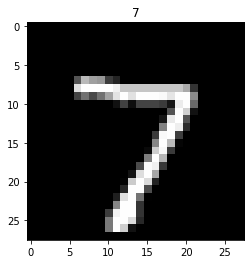

In [13]:
plt.title(test_y[0])
plt.imshow(test_image, 'gray')
plt.show()

- 모델에 Input Data로 확인 할 이미지 데이터 넣기

In [14]:
test_image.shape

(28, 28)

In [15]:
pred = model.predict(test_image.reshape(1, 28, 28, 1))

In [16]:
pred.shape

(1, 10)

In [ ]:
0,0,0,0,0,0,0,0,0,0

In [17]:
pred

array([[4.2538341e-11, 7.1747108e-10, 9.4590886e-09, 1.5641747e-07,
        5.6801227e-11, 8.6749746e-11, 5.2042440e-16, 9.9999988e-01,
        4.8694254e-10, 2.1918080e-08]], dtype=float32)

- np.argmax

In [18]:
np.argmax(pred)

7

## Test Batch

Batch로 Test Dataset 넣기

In [19]:
test_batch = test_x[:32]
test_batch.shape

(32, 28, 28, 1)

Batch Test Dataset 모델에 넣기

In [20]:
preds = model.predict(test_batch)

- 결과 확인

In [22]:
preds.shape
np.argmax(preds, -1)

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4, 9, 6,
       6, 5, 4, 0, 7, 4, 0, 1, 3, 1], dtype=int64)

In [23]:
test_batch[2, :, :, 0].shape

(28, 28)

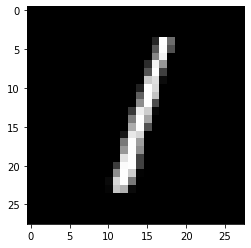

In [24]:
plt.imshow(test_batch[2, :, :, 0], 'gray')
plt.show()